<a href="https://colab.research.google.com/github/Constantinodd/Jupyter-notebook.ipynb/blob/main/Analiseexploratoriadedados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import functools
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import pandas as pd
import seaborn as sns

In [2]:
data = {
    'Município': ['Florianópolis', 'Joinville', 'Blumenau', 'Chapecó', 'Itajaí'],
    'Total absoluto de crimes': [4492, 4433, 3151, 2823, 2813],
    'População': [576361, 654888, 380597, 275959, 287289]
}

df = pd.DataFrame(data)

# Calcular a média do total absoluto de crimes
media_crimes = df['Total absoluto de crimes'].mean()
print(f"Média do total absoluto de crimes: {media_crimes:.2f}")

# Calcular a média da população
media_populacao = df['População'].mean()
print(f"Média da população: {media_populacao:.2f}")

# Calcular a taxa de criminalidade por 100 mil habitantes
df['Taxa por 100 mil'] = (df['Total absoluto de crimes'] / df['População']) * 100000
media_taxa = df['Taxa por 100 mil'].mean()
print(f"Média da taxa de criminalidade (por 100 mil habitantes): {media_taxa:.2f}")

# Calcular a taxa de criminalidade para cada município (útil para média ponderada)
df['Taxa'] = df['Total absoluto de crimes'] / df['População']

# Calcular a média ponderada da taxa, usando a população como peso
media_ponderada_taxa = np.average(df['Taxa'], weights=df['População']) * 100000
print(f"Média ponderada da taxa de criminalidade (por 100 mil habitantes): {media_ponderada_taxa:.2f}")

# Calcular a mediana do 'Total absoluto de crimes'
mediana_crimes = df['Total absoluto de crimes'].median()
print(f"Mediana do total absoluto de crimes: {mediana_crimes}")

def descriptive_stats(series):
    """Calcula diversas estatísticas descritivas para uma série."""
    stats = pd.Series({
        'Mínimo': series.min(),
        'Percentil 25': series.quantile(0.25),
        'Mediana': series.median(),
        'Percentil 75': series.quantile(0.75),
        'Máximo': series.max(),
        'Variância': series.var(),
        'Desvio Padrão': series.std(),
        'Desvio Absoluto Médio': np.mean(np.abs(series - series.mean())), # Cálculo manual do MAD
        'Amplitude': series.max() - series.min(),
        'Amplitude Interquartílica (AIQ)': series.quantile(0.75) - series.quantile(0.25)
    })
    return stats

def mad_from_median(series):
    """Calcula o Desvio Absoluto Mediano da Mediana."""
    median_val = series.median()
    absolute_deviations = np.abs(series - median_val)
    return absolute_deviations.median()

print("\nEstatísticas Descritivas:")
numerical_cols = ['Total absoluto de crimes', 'População', 'Taxa por 100 mil']
all_stats = df[numerical_cols].apply(descriptive_stats).T
all_stats['Mediana Desvio Absoluto da Mediana (MAD)'] = df[numerical_cols].apply(mad_from_median).T
print(all_stats)

# Exemplo de Percentil específico (Percentil 90)
percentil_90_crimes = df['Total absoluto de crimes'].quantile(0.9)
print(f"\nPercentil 90 do 'Total absoluto de crimes': {percentil_90_crimes:.2f}")

percentil_90_populacao = df['População'].quantile(0.9)
print(f"Percentil 90 da 'População': {percentil_90_populacao:.2f}")

percentil_90_taxa = df['Taxa por 100 mil'].quantile(0.9)
print(f"Percentil 90 da 'Taxa por 100 mil habitantes': {percentil_90_taxa:.2f}")

print("\nDataFrame Original:")
print(df)

Média do total absoluto de crimes: 3542.40
Média da população: 435018.80
Média da taxa de criminalidade (por 100 mil habitantes): 857.26
Média ponderada da taxa de criminalidade (por 100 mil habitantes): 814.31
Mediana do total absoluto de crimes: 3151.0

Estatísticas Descritivas:
                                Mínimo  Percentil 25        Mediana  \
Total absoluto de crimes    2813.00000    2823.00000    3151.000000   
População                 275959.00000  287289.00000  380597.000000   
Taxa por 100 mil             676.90964     779.37265     827.909836   

                           Percentil 75         Máximo     Variância  \
Total absoluto de crimes    4433.000000    4492.000000  7.244158e+05   
População                 576361.000000  654888.000000  2.960148e+10   
Taxa por 100 mil             979.153396    1022.978051  2.044365e+04   

                          Desvio Padrão  Desvio Absoluto Médio      Amplitude  \
Total absoluto de crimes     851.126195             736.080000 

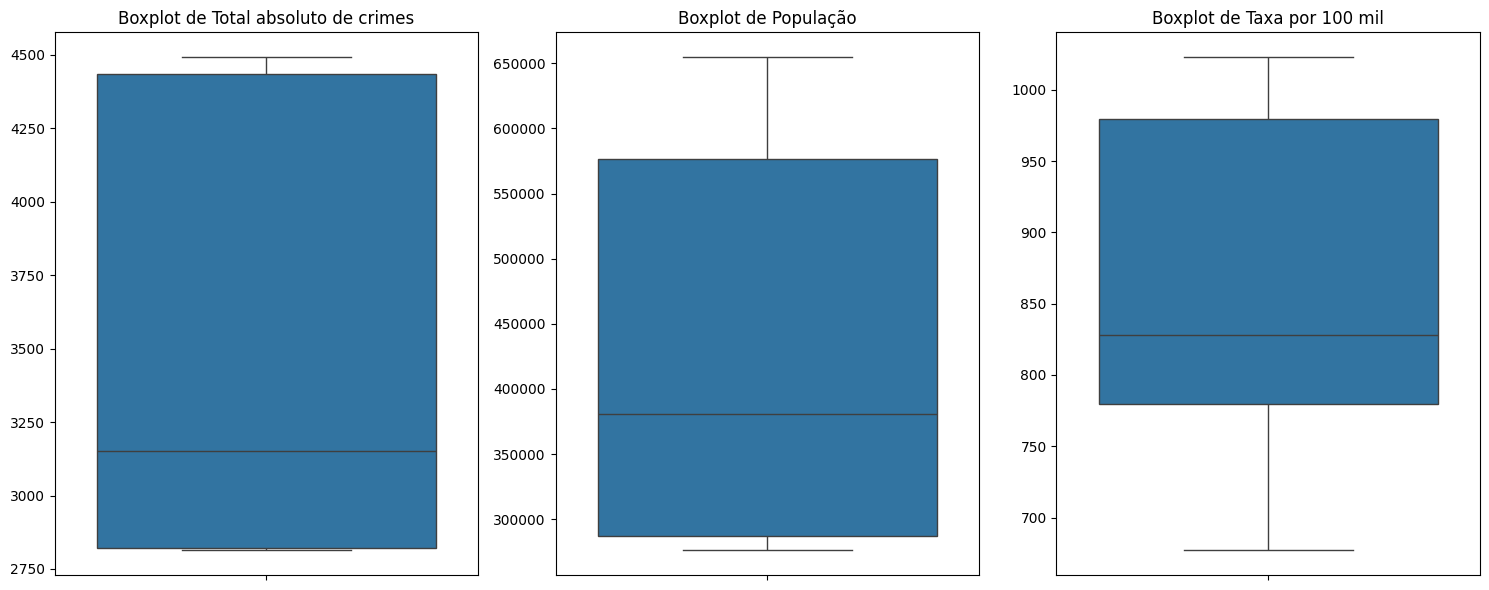

In [3]:
data = {
    'Município': ['Florianópolis', 'Joinville', 'Blumenau', 'Chapecó', 'Itajaí'],
    'Total absoluto de crimes': [4492, 4433, 3151, 2823, 2813],
    'População': [576361, 654888, 380597, 275959, 287289]
}

df = pd.DataFrame(data)

# Calcular a taxa de criminalidade por 100 mil habitantes
df['Taxa por 100 mil'] = (df['Total absoluto de crimes'] / df['População']) * 100000

# Definir as colunas numéricas para os boxplots
numerical_cols = ['Total absoluto de crimes', 'População', 'Taxa por 100 mil']

# Criar subplots para cada boxplot
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(15, 6))

# Gerar um boxplot para cada coluna numérica
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel('') # Remover o label do eixo y para evitar redundância se o título for claro

plt.tight_layout() # Ajustar o layout para evitar sobreposição
plt.show()

In [1]:
data = {
    'Município': ['Florianópolis', 'Joinville', 'Blumenau', 'Chapecó', 'Itajaí'],
    'Total absoluto de crimes': [4492, 4433, 3151, 2823, 2813],
    'População': [576361, 654888, 380597, 275959, 287289]
}

df = pd.DataFrame(data)

# Calcular a taxa de criminalidade por 100 mil habitantes
df['Taxa por 100 mil'] = (df['Total absoluto de crimes'] / df['População']) * 100000

# Definir as colunas numéricas para as estimativas de densidade
numerical_cols = ['Total absoluto de crimes', 'População', 'Taxa por 100 mil']

# Criar subplots para cada estimativa de densidade
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(15, 6))

# Gerar uma estimativa de densidade para cada coluna numérica
for i, col in enumerate(numerical_cols):
    sns.kdeplot(data=df, x=col, ax=axes[i], fill=True)
    axes[i].set_title(f'Estimativa de Densidade de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Densidade')

plt.tight_layout() # Ajustar o layout para evitar sobreposição
plt.show()

ERROR: Error in parse(text = input): <text>:2:18: unexpected '['
1: data = {
2:     'Município': [
                    ^


In [5]:
# Instalar o pacote ggplot2 se ainda não tiver (execute apenas uma vez)
# install.packages("ggplot2")

# Carregar o pacote ggplot2
library(ggplot2)

# Criar o data frame com os dados fornecidos
dados <- data.frame(
  Municipio = c('Florianópolis', 'Joinville', 'Blumenau', 'Chapecó', 'Itajaí'),
  Total_absoluto_de_crimes = c(4492, 4433, 3151, 2823, 2813),
  Populacao = c(576361, 654888, 380597, 275959, 287289)
)

# Calcular a taxa de criminalidade por 100 mil habitantes
dados$Taxa_por_100_mil <- (dados$Total_absoluto_de_crimes / dados$Populacao) * 100000

# --- Gerar Estimativa de Densidade para 'Total absoluto de crimes' ---
ggplot(dados, aes(x = Total_absoluto_de_crimes)) +
  geom_density(fill = "skyblue", alpha = 0.7) +
  labs(title = "Estimativa de Densidade de Total absoluto de crimes",
       x = "Total absoluto de crimes",
       y = "Densidade") +
  theme_minimal() # Um tema visual mais limpo

# --- Gerar Estimativa de Densidade para 'População' ---
ggplot(dados, aes(x = Populacao)) +
  geom_density(fill = "lightcoral", alpha = 0.7) +
  labs(title = "Estimativa de Densidade de População",
       x = "População",
       y = "Densidade") +
  theme_minimal()

# --- Gerar Estimativa de Densidade para 'Taxa por 100 mil' ---
ggplot(dados, aes(x = Taxa_por_100_mil)) +
  geom_density(fill = "lightgreen", alpha = 0.7) +
  labs(title = "Estimativa de Densidade de Taxa por 100 mil habitantes",
       x = "Taxa por 100 mil habitantes",
       y = "Densidade") +
  theme_minimal()

SyntaxError: invalid syntax (<ipython-input-5-f1155eecaa6d>, line 15)

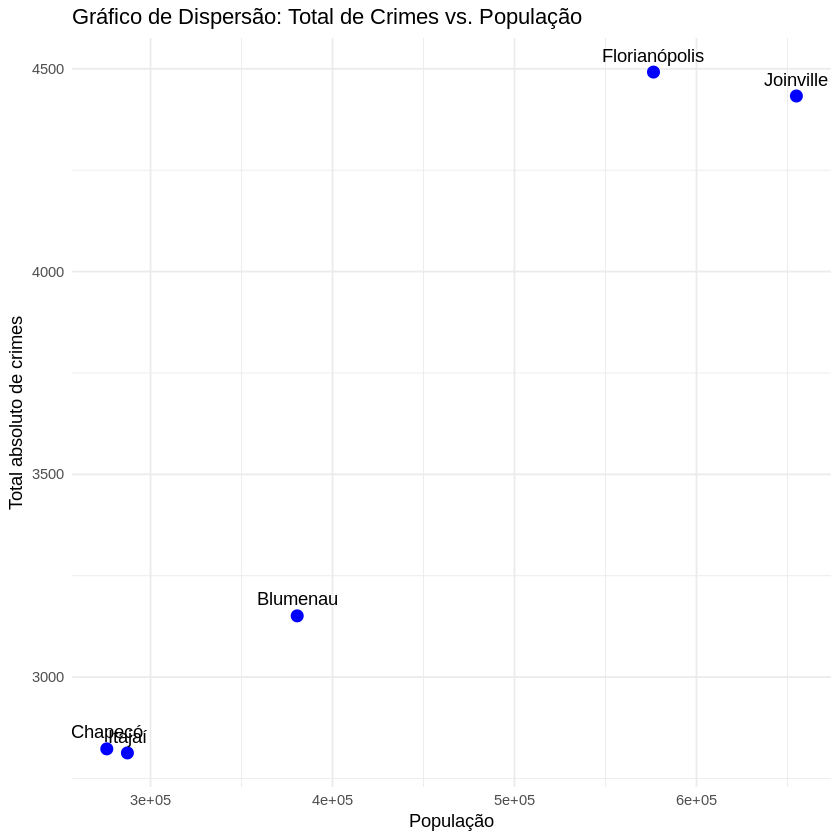

In [2]:
# Instalar o pacote ggplot2 se ainda não tiver (execute apenas uma vez)
# install.packages("ggplot2")

# Carregar o pacote ggplot2
library(ggplot2)

# Criar o data frame com os dados fornecidos
dados <- data.frame(
  Municipio = c('Florianópolis', 'Joinville', 'Blumenau', 'Chapecó', 'Itajaí'),
  Total_absoluto_de_crimes = c(4492, 4433, 3151, 2823, 2813),
  Populacao = c(576361, 654888, 380597, 275959, 287289)
)

# Calcular a taxa de criminalidade por 100 mil habitantes (opcional para este gráfico específico, mas mantém o dataframe completo)
dados$Taxa_por_100_mil <- (dados$Total_absoluto_de_crimes / dados$Populacao) * 100000

# --- Gerar Gráfico de Dispersão (População vs. Total de Crimes) ---
ggplot(dados, aes(x = Populacao, y = Total_absoluto_de_crimes)) +
  geom_point(size = 3, color = "blue") + # Adiciona os pontos
  geom_text(aes(label = Municipio), vjust = -0.8, hjust = 0.5) + # Adiciona rótulos dos municípios
  labs(title = "Gráfico de Dispersão: Total de Crimes vs. População",
       x = "População",
       y = "Total absoluto de crimes") +
  theme_minimal() # Um tema visual mais limpo